In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import Jennifer image
jennifer = cv.imread('a1images/jeniffer.jpg')
assert jennifer is not None
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
jennifer_rgb = cv.cvtColor(jennifer, cv.COLOR_BGR2RGB)

# Split into planes
H, S, V = cv.split(jennifer_hsv)

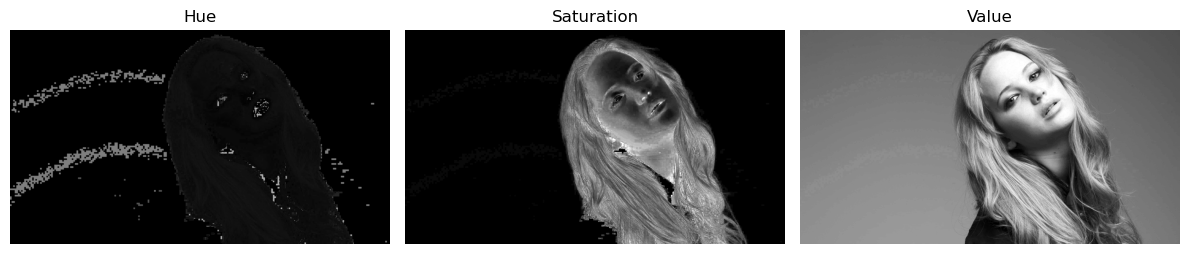

In [3]:
# Create the figure for plotting
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

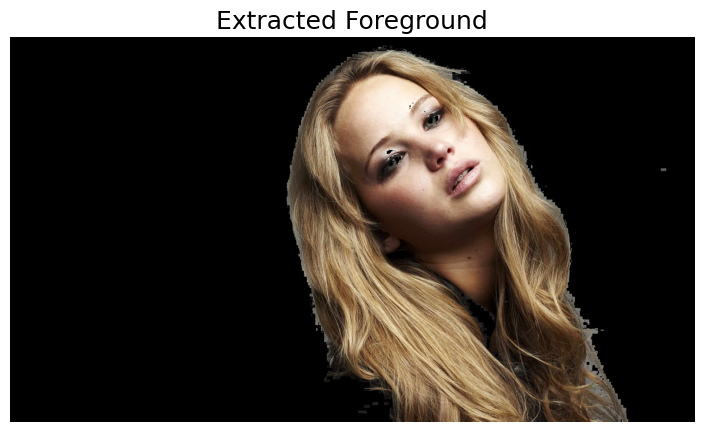

In [4]:
# Apply thresholding on Saturation plane
_, mask = cv.threshold(S, 12, 255, cv.THRESH_BINARY)

# Use bitwise_and to extract the foreground using the mask
foreground = cv.bitwise_and(jennifer, jennifer, mask=mask)

# Display the extracted foreground
plt.figure(figsize=(10, 5))

plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground', fontsize=18)
plt.axis('off')
plt.show()

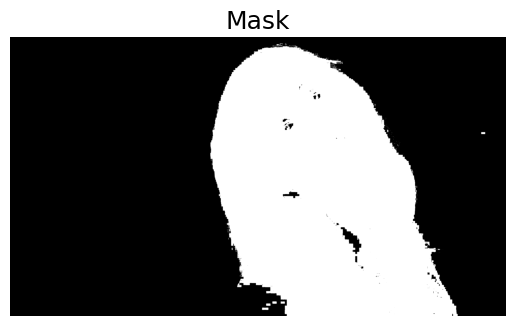

In [5]:
plt.imshow(mask, cmap='gray')
plt.title('Mask', fontsize=18)
plt.axis('off')
plt.show()

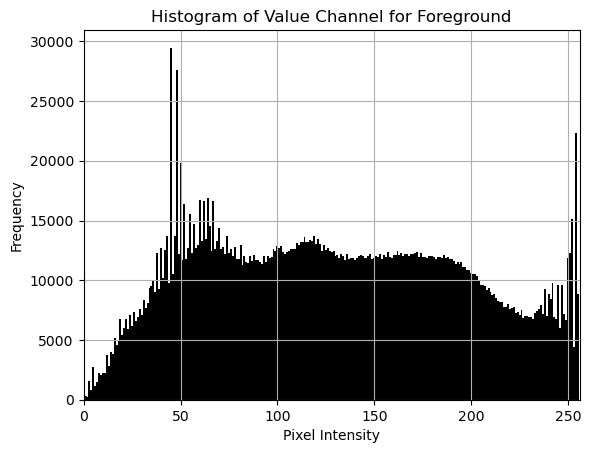

In [6]:
# Compute and plot the histogram of the Value (V) channel of the foreground
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
H_fg, S_fg, V_fg = cv.split(foreground_hsv)

# Calculate the histogram of the Value channel
hist = cv.calcHist([V_fg], [0], mask, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='black', width=1)  # Use width=1 for each bar
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits
plt.grid(True)
plt.show()

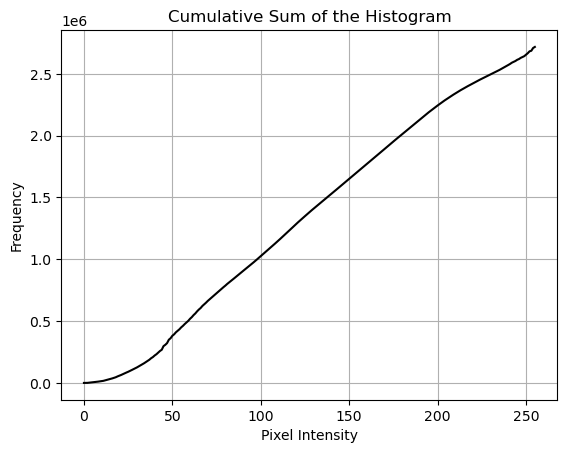

In [7]:
cdf = hist.cumsum()

# Plot the histogram
plt.figure()
plt.plot(cdf, color='black')
plt.title('Cumulative Sum of the Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

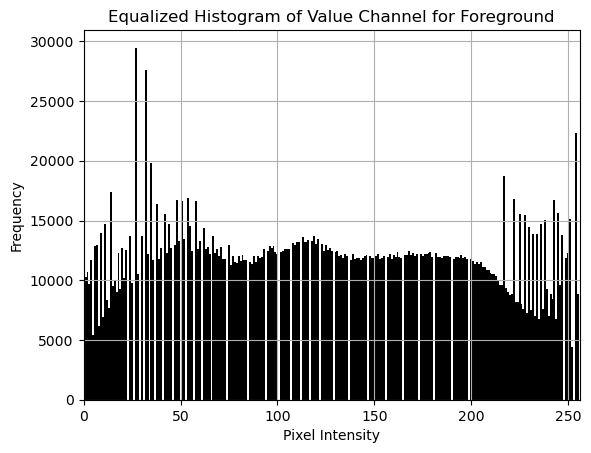

In [8]:
# Number of pixels
pixels = cdf[-1]

# Define transformation
t = np.array([(256-1)/(pixels)*cdf[k] for k in range(256)]).astype("uint8")

# Equalize
V_eq = t[V_fg]

# Calculate the histogram of the equalized Value channel
hist = cv.calcHist([V_eq], [0], mask, [256], [0, 256])

# Create an array for the x positions of the bars
x_positions = np.arange(len(hist))

# Plot the histogram as a bar plot
plt.figure()
plt.bar(x_positions, hist.flatten(), color='black', width=1)  # Use width=1 for each bar
plt.title('Equalized Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 256])  # Set x-axis limits
plt.grid(True)
plt.show()

In [9]:
# Merge
merged = cv.merge([H_fg, S_fg, V_eq])
foreground_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

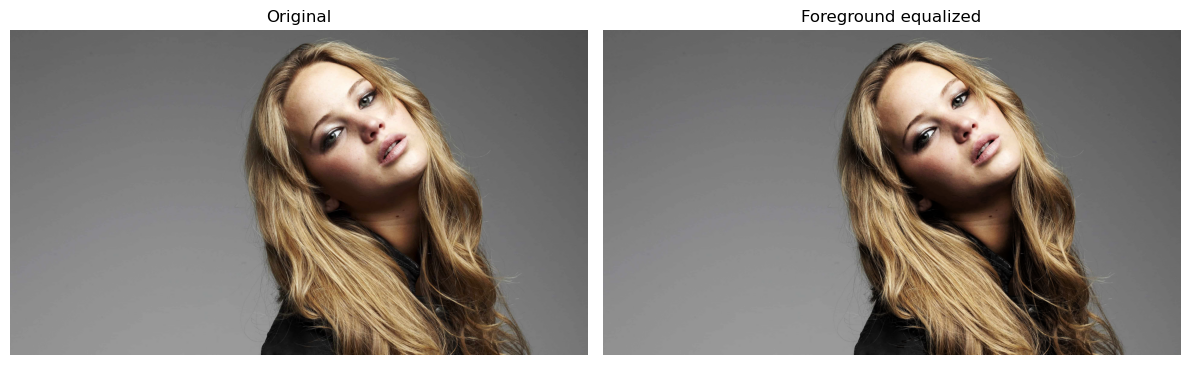

In [10]:
# Extract the background
background = cv.bitwise_and(jennifer, jennifer, mask=cv.bitwise_not(mask))

# Merge the equalized foreground and background
result = cv.add(cv.cvtColor(background, cv.COLOR_BGR2RGB), foreground_modified)

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

# Plot the first image
axs[0].imshow(jennifer_rgb)
axs[0].set_title('Original')
axs[0].axis('off')  # Turn off the axis

# Plot the second image
axs[1].imshow(result)
axs[1].set_title('Foreground equalized')
axs[1].axis('off')  # Turn off the axis

# Show the plot
plt.tight_layout()
plt.show()
